### Step 1 : Importing Libraries

In [211]:
#importing warnings ignore 
import warnings
warnings.filterwarnings('ignore')

In [212]:
#importing basic libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

### Step 2: Reading Dataset and Understanding Data

1. Understanding data structure - view columns
2. Check the dataset for anomolies - Check all the statistics and data types of the data
3. Fix data types, missing values or impute

In [213]:
#importing data 
bike_sharing = pd.read_csv('Downloads/day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [214]:
bike_sharing.shape

(730, 16)

In [215]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [216]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [217]:
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Inference: There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.


### Step 3 : Cleaning Data

##### 3.1 Drop columns that are not useful for analysis
- 'instant' is just a row instance identifier.
- 'dteday' is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- 'casual' and 'registered' variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage

In [218]:
# Droping instant column 
bike_sharing.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns h
bike_sharing.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns 

bike_sharing.drop(['casual'], axis = 1, inplace = True)
bike_sharing.drop(['registered'], axis = 1, inplace = True)

##### 3.2 Handling Outliers 

In [219]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [220]:
#printing the unique values of the columns 
bike_sharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

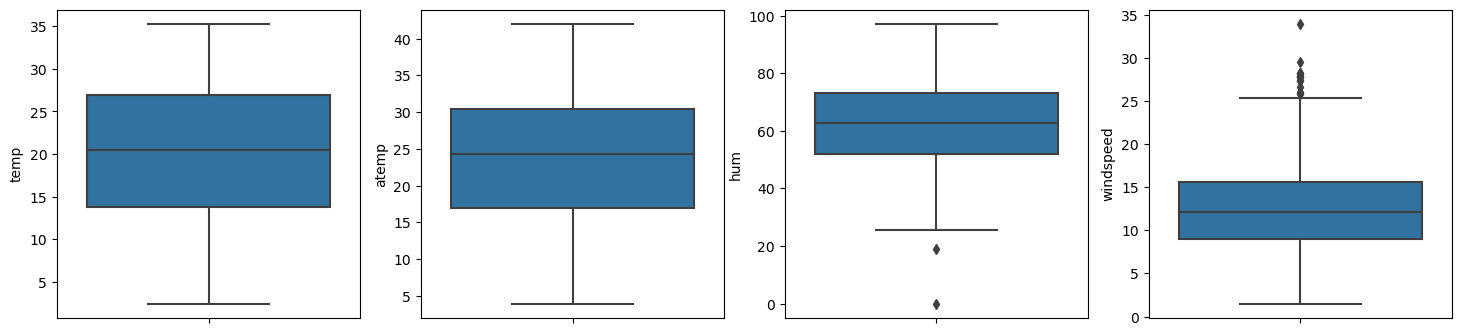

In [221]:
# Drawing box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_sharing)
    i+=1

##### From these plots, we can see there are no outliers to be handled. We are good to proceed with the data set


### Step 4 : Explolatory Data Analysis 

##### 4.1 Converting the Season, Month/Year and Weathersit to categorical types

In [222]:
# maped the season column according to string value corresponding to the value in dataset
bike_sharing['season'] = bike_sharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# maped the weekday column according to string value corresponding to the value in dataset
bike_sharing['weekday'] = bike_sharing['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})


# maped mnth column values with numbers (1 to 12 ) from (jan to dec months) 
bike_sharing['mnth'] = bike_sharing['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

#  maped weathersit columnto string value corresponding to the value in dataset
bike_sharing['weathersit'] = bike_sharing['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})

##### 4.2 Draw pair Plots to check the linear relationship for the numeric colomns 

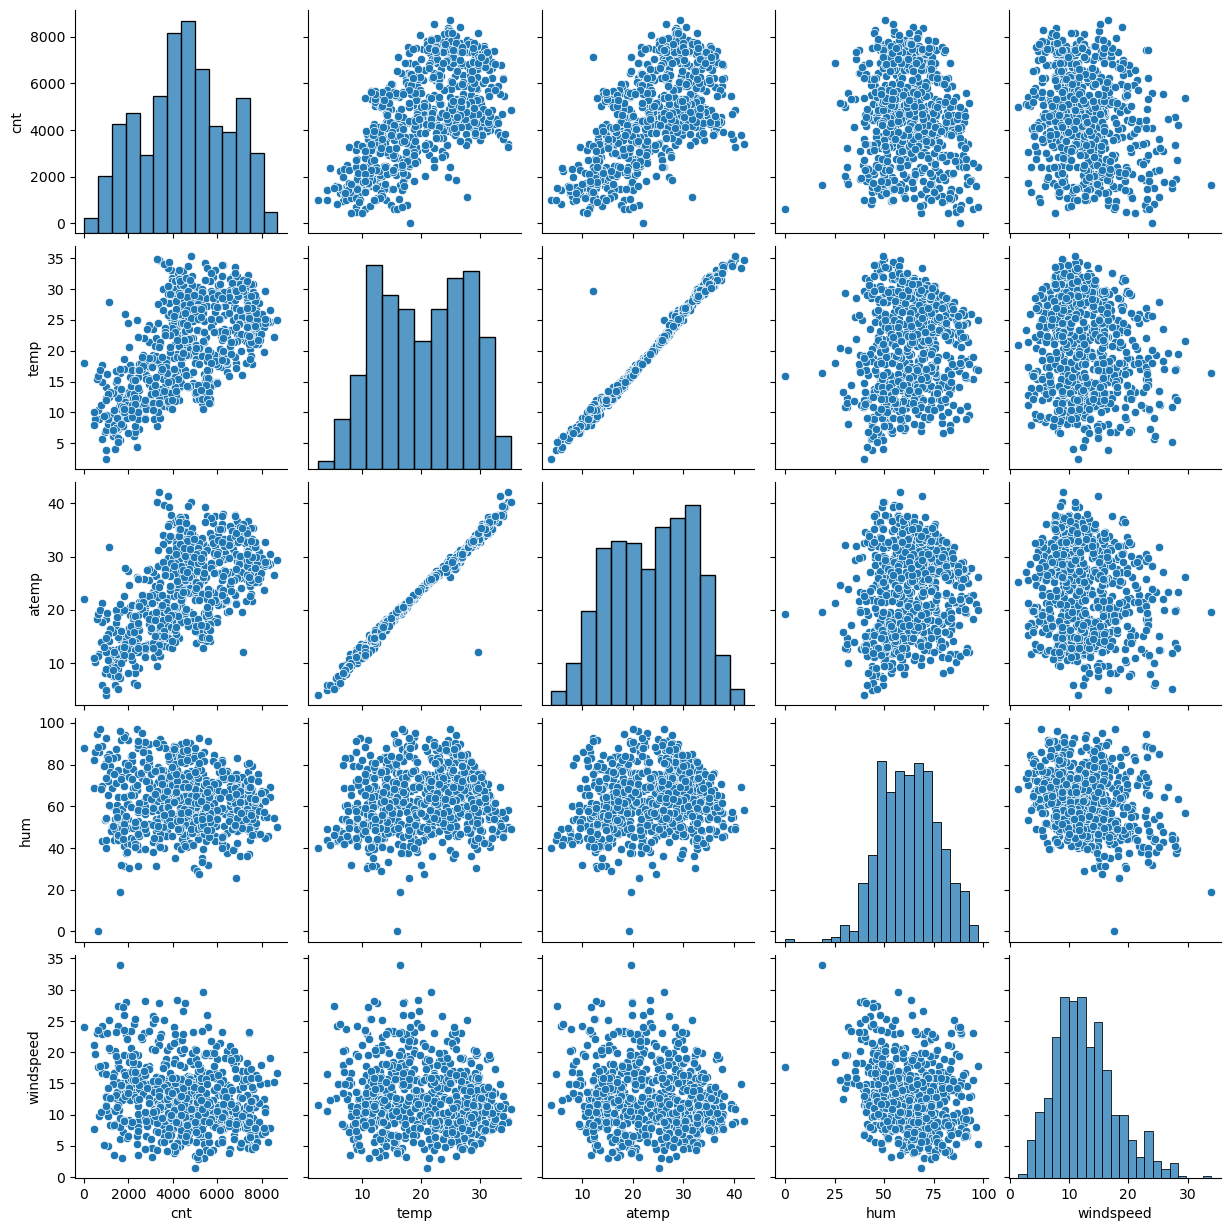

In [39]:
#Draw pairplots for continuous numeric variables using seaborn
sns.pairplot(data=bike_sharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Inference : 
- After seeing the plots above we can see that the "temp" and "atemp" are highly correlated with eachother.
- Secondly, it looks like the "temp" and "atemp" has the highest corelation with the target variable "cnt"

##### 4.3 Checking Correlation between variables using heatmaps

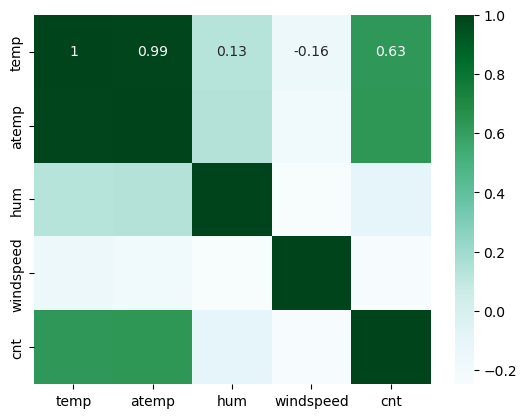

In [144]:
# Checking continuous variables relationship with each other
sns.heatmap(bike_sharing[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

Inference : 

In the correlation heatmap we can see that - 
- temp
- atemp
   
Seems to be highly correlated and only should variable can be considered for the model. However we will make this decision of elimination based on the Variance Inflation Factor later during the model building. We also see Target variable has a linear relationship with some of the indeptendent variables. 

- Good sign for building a linear regression Model.


##### 4.4 Box Plot Visualtion of the categorical data against Target

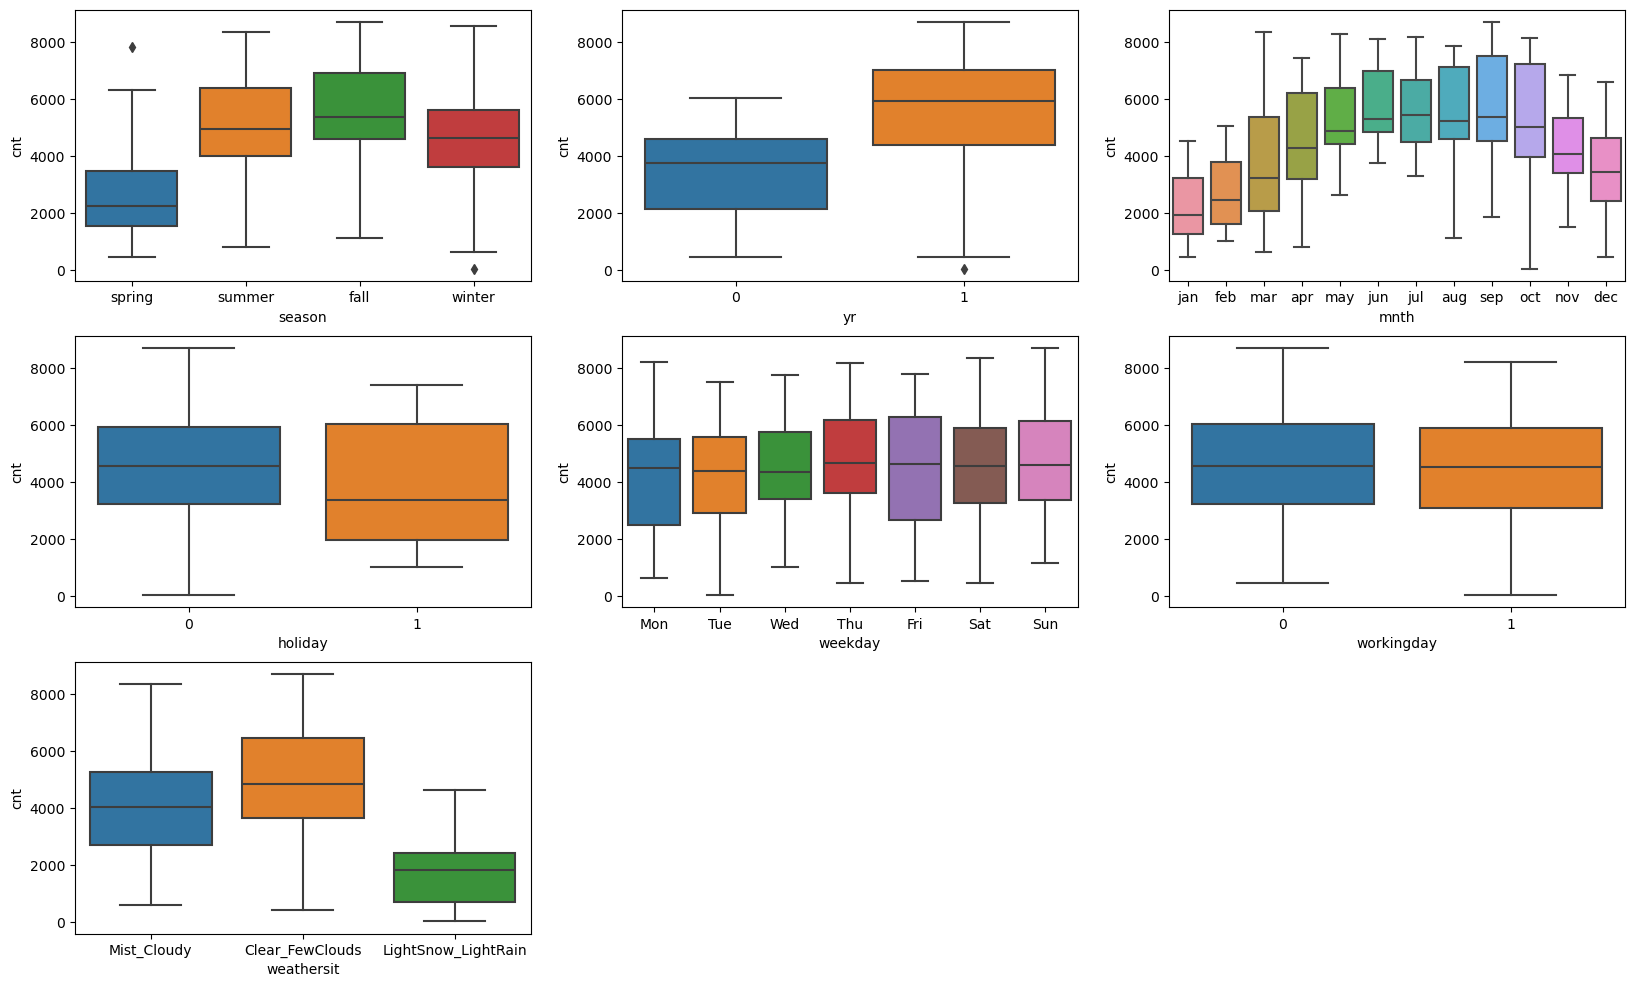

In [52]:
plt.figure(figsize=(20,12)) ## to control the figure size

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike_sharing)
plt.show()

Inference:

Here many insights can be drawn from the plots

1. For the variable season, we can clearly see that the category 3 : 'Fall', has the highest median, which shows that the demand was high during this season and the least is category 1 : 'spring'.
2. The year 2019 had a higher count of users as compared to the year 2018.
3. Demand is continuously growing each month till June and reached its limit in September month but demand started declining after September.
4. When there is a holiday, demand has decreased.
5. The count of rentals is almost even throughout the week.
6. From the Workingday boxplot we can see those maximum bookings happening between 4000 and 6000, that is the median count of users is constant almost throughout the week. There is not much of difference in booking whether its working day or not.
7. There are less users when there is heavy rain/ snow indicating that this weather is quite adverse and highest count was seen when the weather situation was Clear, Partly Cloudy.

##### 4.5 Year - Wise analysis of the categorical data : 2018 VS 2019

AttributeError caught: 'numpy.int64' object has no attribute 'startswith'


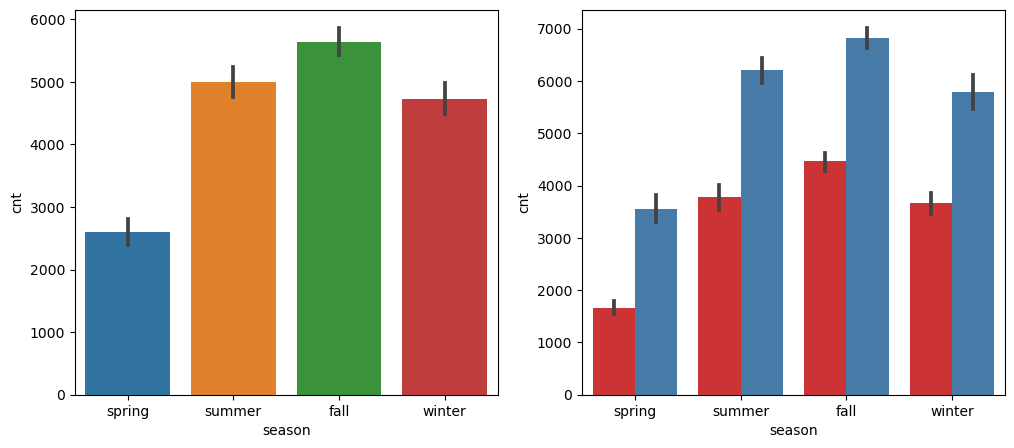

In [90]:
try:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.barplot(x ='season', y = 'cnt', data = bike_sharing)
    plt.subplot(1,2,2)
    sns.barplot(x ='season', y = 'cnt',data= bike_sharing, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()
except AttributeError as e:
    print(f"AttributeError caught: {e}")
    # Handle the error by possibly converting the data to categorical, etc.

Inference : 
- Fall season attractes more booking.
- In each season the booking count has increased drastically from 2018 to 2019.

AttributeError caught: 'numpy.int64' object has no attribute 'startswith'


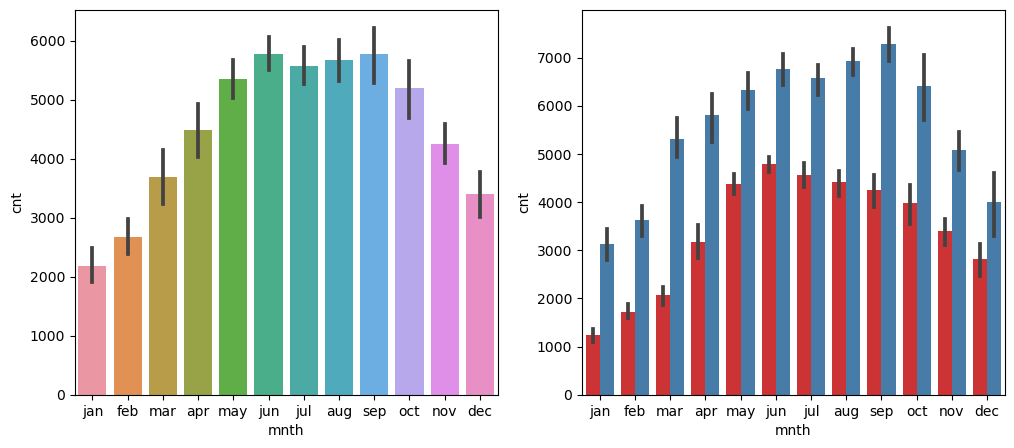

In [91]:
try:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.barplot(x ='mnth', y = 'cnt', data = bike_sharing)
    plt.subplot(1,2,2)
    sns.barplot(x ='mnth', y = 'cnt',data= bike_sharing, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()
except AttributeError as e:
    print(f"AttributeError caught: {e}")
    # Handle the error by possibly converting the data to categorical, etc.

Inference :
- The majority of bookings occurred during May, June, July, August, September, and October. The trend showed an upward movement from the beginning of the year, peaking around the middle, and then gradually declining towards the year's end. Additionally, the number of bookings for each month appears to have risen from 2018 to 2019.

AttributeError caught: 'numpy.int64' object has no attribute 'startswith'


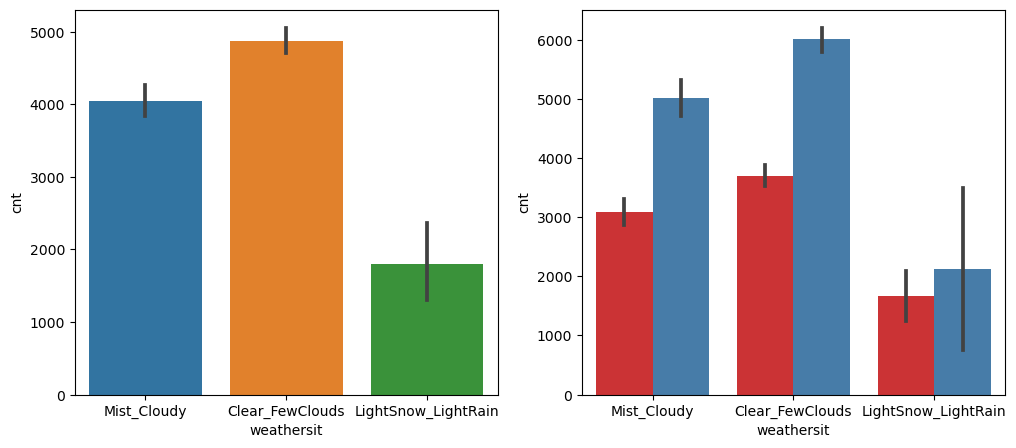

In [93]:
try: 
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.barplot(x ='weathersit', y = 'cnt', data = bike_sharing)
    plt.subplot(1,2,2)
    sns.barplot(x ='weathersit', y = 'cnt',data= bike_sharing, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()
except AttributeError as e:
    print(f"AttributeError caught: {e}")
    # Handle the error by possibly converting the data to categorical, etc.

Inference :
- Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

AttributeError caught: 'numpy.int64' object has no attribute 'startswith'


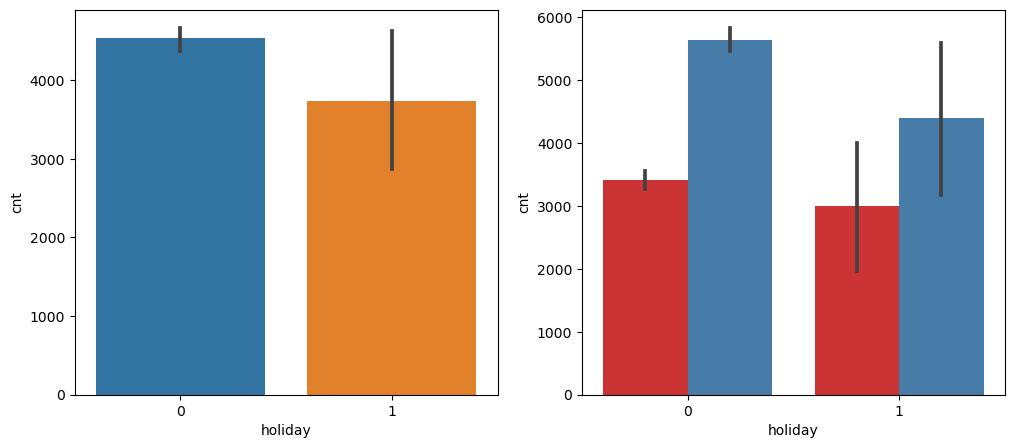

In [95]:
try: 
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.barplot(x ='holiday', y = 'cnt', data = bike_sharing)
    plt.subplot(1,2,2)
    sns.barplot(x ='holiday', y = 'cnt',data= bike_sharing, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()
except AttributeError as e:
    print(f"AttributeError caught: {e}")
    # Handle the error by possibly converting the data to categorical, etc.

Inference :
- When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

##### 4.6 Unilateral Analysis for Numeric columns

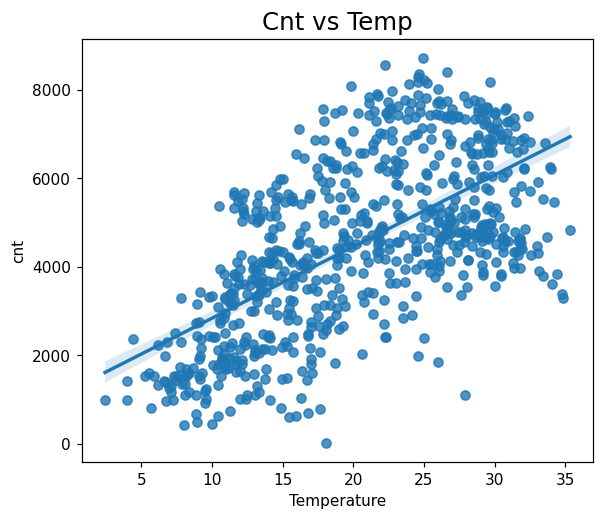

In [97]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike_sharing,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

Inference : 
- Demand for bikes is positively correlated to temp.
- Cnt is linearly increasing with temp indicating linear relation.

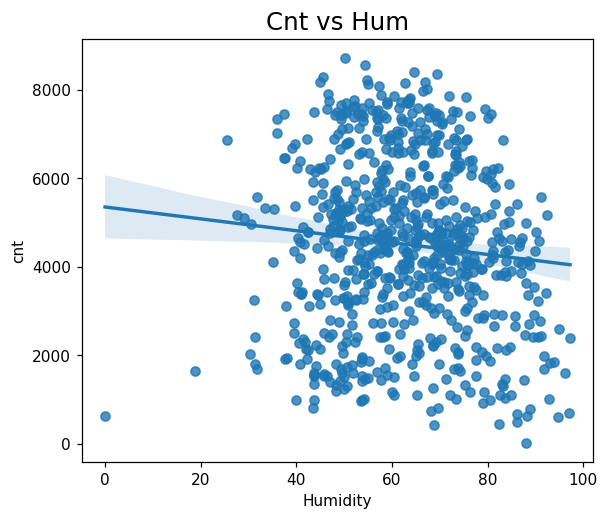

In [99]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike_sharing,x='hum',y='cnt')
plt.xlabel("Humidity")
plt.show()

Inference :
- 'Hum' values are more scattered around.
- Although we can see 'cnt' decreasing with increase in humidity.

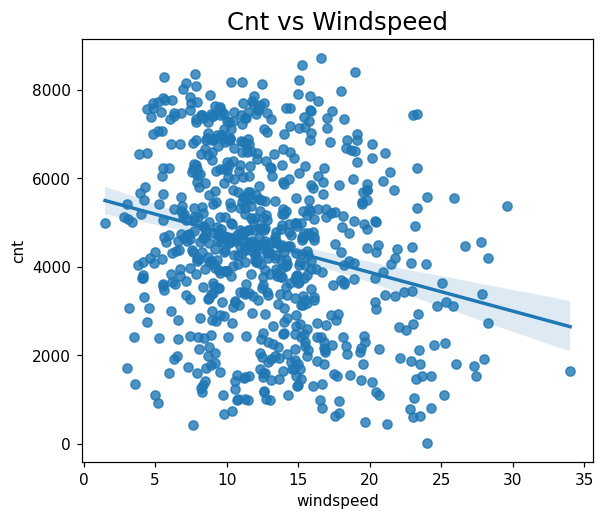

In [100]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bike_sharing,y="cnt",x="windspeed")
plt.show()

Inference:
- Windspeed values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

### Step 5 : Data Preparation for Linear Regression

##### 5.1 Creating dummy variables for all the categorical variables like 0 and 1

In [239]:
# Create a new dataframe to store them
status=pd.get_dummies(bike_sharing[['season','mnth','weekday']],dtype=int, drop_first=True)
status1=pd.get_dummies(bike_sharing['weathersit'],dtype=int)

In [240]:
# We then join orignal data and the dummy variable dataframe 'status'.
final=pd.concat([bike_sharing,status,status1],axis=1)
final.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Clear_FewClouds,LightSnow_LightRain,Mist_Cloudy
0,spring,0,jan,0,Mon,1,Mist_Cloudy,14.110847,18.18125,80.5833,...,0,1,0,0,0,0,0,0,0,1
1,spring,0,jan,0,Tue,1,Mist_Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,1
2,spring,0,jan,0,Wed,1,Clear_FewClouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,1,0,0
3,spring,0,jan,0,Thu,1,Clear_FewClouds,8.200000,10.60610,59.0435,...,0,0,0,0,1,0,0,1,0,0
4,spring,0,jan,0,Fri,1,Clear_FewClouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [241]:
# We then drop the indivisual columns whose dummy variables have been created.
final_dataset=final.drop(['season','mnth','weekday','weathersit'],axis=1)
final_dataset.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Clear_FewClouds,LightSnow_LightRain,Mist_Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


##### 5.2 Splitting the data into Train and Test

In [242]:
# Create df_train and df_test split from the dataframe and check their shape
df_train,df_test=train_test_split(final_dataset,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape) 

(510, 31)
(220, 31)


##### 5.3 Rescaling the data 

In [243]:
Scaler = MinMaxScaler()

In [244]:
# Making the list of the variables that to be scaled 
var_list = ['temp','atemp','hum','windspeed','cnt']

In [245]:
# Scale all the numeric variables between 0 to 1
df_train[var_list] = Scaler.fit_transform(df_train[var_list])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Clear_FewClouds,LightSnow_LightRain,Mist_Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,1,0,0,0,0,0,1


In [246]:
# Split df_train further into X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train

### Step 6 : Building the Model 

##### 6.1 Using the RFE method to eliminate some columns

In [247]:
# Building a Linear Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [248]:
#Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [249]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 10),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 6),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 12),
 ('Clear_FewClouds', True, 1),
 ('LightSnow_LightRain', True, 1),
 ('Mist_Cloudy', True, 1)]

##### 6.2 Manual elimination

Function to calculate VIFs 

In [250]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [251]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'Clear_FewClouds', 'LightSnow_LightRain', 'Mist_Cloudy'],
      dtype='object')

In [252]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [253]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'Clear_FewClouds', 'LightSnow_LightRain', 'Mist_Cloudy']]

### Step 7 : Training the Model

#### Model 1 : Taking all the variables selected by RFE

In [258]:
cols = (['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'Clear_FewClouds', 'LightSnow_LightRain', 'Mist_Cloudy'])
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          4.41e-189
Time:                        02:48:21   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1541    

#### Model 2 : Dropping the variable mnth_nov as it has negative coefficient and is insignificant as it has high p-value

In [260]:
cols = (['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_jan',
       'mnth_sep', 'Clear_FewClouds', 'LightSnow_LightRain', 'Mist_Cloudy'])
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          7.59e-190
Time:                        02:54:14   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1494    

#### Model 3 : Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value

In [262]:
cols = (['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul','mnth_sep', 'Clear_FewClouds', 'LightSnow_LightRain', 'Mist_Cloudy'])
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          2.95e-190
Time:                        02:55:36   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1412    

#### Model 4 : All the columns have p-value > .05 so after checking VIFs - Clear_FewClouds has very high VIF

In [263]:
cols = (['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul','mnth_sep','LightSnow_LightRain', 'Mist_Cloudy'])
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          2.95e-190
Time:                        03:00:48   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2848    

#### Model 5 : As we can seen the 'humidity' VIF has increased so dropping the variable 'humidity' as it has negative coefficient and is insignificant as it has high VIF


In [264]:
cols = (['yr', 'holiday', 'temp','windspeed', 'season_spring','season_summer', 'season_winter', 'mnth_jul','mnth_sep','LightSnow_LightRain', 'Mist_Cloudy'])
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          5.06e-187
Time:                        03:03:30   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1994    

##### Inference :

##### Regression Results:

- R-squared: 0.835 indicates that your model explains approximately 83.5% of the variance in the dependent variable (cnt).
- Adjusted R-squared: 0.832 adjusts for the number of predictors in your model.
- F-statistic: 229.6 with a very low p-value (5.06e-187) suggests that your overall model is statistically significant.
- Coefficients Interpretation: Each coefficient represents the change in the dependent variable (cnt) per unit change in the corresponding predictor, holding other predictors constant.k!



##### VIF (Variance Inflation Factor):
- VIF measures multicollinearity among predictors. Generally, VIF values below 5 indicate low multicollinearity. Your predictors generally have low VIF values, suggesting they are not highly correlated.

##### Conclusion: The model appears robust with significant predictors and low multicollinearity, as indicated by the coefficients and VIF values.

In [268]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [269]:
#Let us build the finalmodel using sklearn
cols = (['yr', 'holiday', 'temp','windspeed', 'season_spring',
         'season_summer', 'season_winter', 'mnth_jul',
         'mnth_sep','LightSnow_LightRain', 'Mist_Cloudy'])

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.1994335759699175 [ 0.23357022 -0.0974631   0.49098774 -0.14791889 -0.06716901  0.0464874
  0.08174147 -0.05205711  0.07684628 -0.28419912 -0.08016658]


### Step 8 : Model Evaluation

##### 7.1 Residucal Analysis

In [270]:
y_train_pred = lr.predict(X_train[cols])

In [271]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

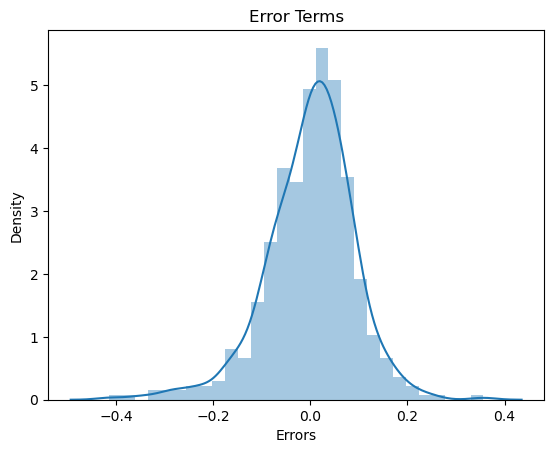

In [272]:
plot_res_dist(y_train, y_train_pred)

As we can see the graph the Errors are normally distribured here with mean 0. So everything seems to be fine


##### Actual vs Predicted

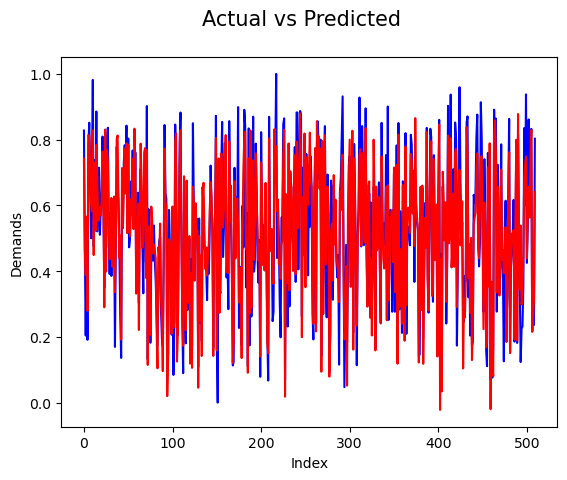

In [273]:
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems ok

##### Error Terms

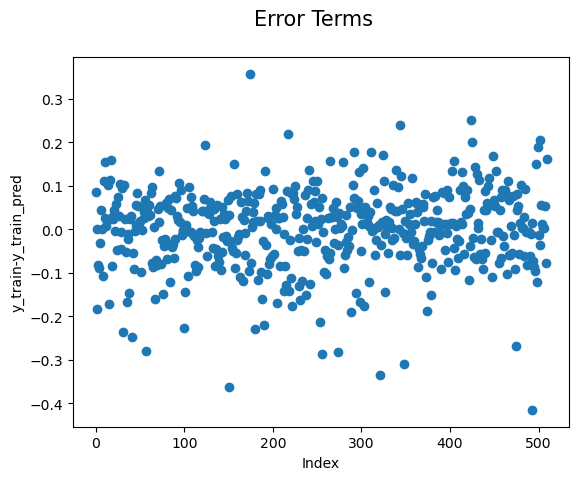

In [275]:
c = [i for i in range(0,len(X_train),1)]
plt.scatter(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Here we can see that the error terms are independent of each other.

#### R-squared Value

In [276]:
r2_score(y_train,y_train_pred)

0.8352819738403638

R2 Same as we obtained for our final model

#### Linearity Check

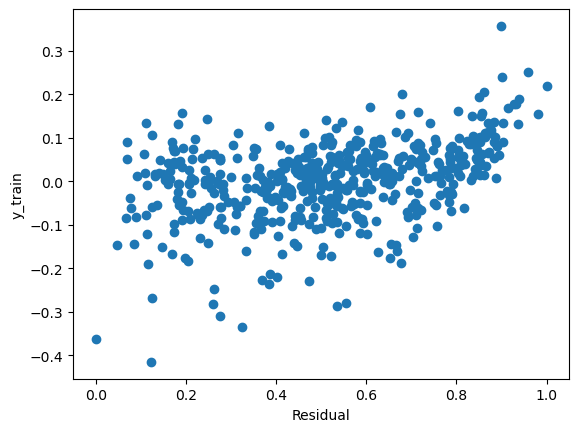

In [277]:
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Predict values for test data set

In [279]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,Clear_FewClouds,LightSnow_LightRain,Mist_Cloudy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,1,0,0,0,0,1,0,0


In [281]:
# Transform the numerical variables 
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = Scaler.fit_transform(df_test[num_vars])

In [282]:
# Splitting df_test into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [283]:
#Columns from our final model
cols = (['yr', 'holiday', 'temp','windspeed', 'season_spring',
         'season_summer', 'season_winter', 'mnth_jul',
         'mnth_sep','LightSnow_LightRain', 'Mist_Cloudy'])

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

##### R-Squared value for test predictions

In [284]:
r2_score(y_test,y_test_pred)

0.79396670763405

##### R2 value for predictions on test data (0.79) is almost same as R2 value of train data(0.83). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

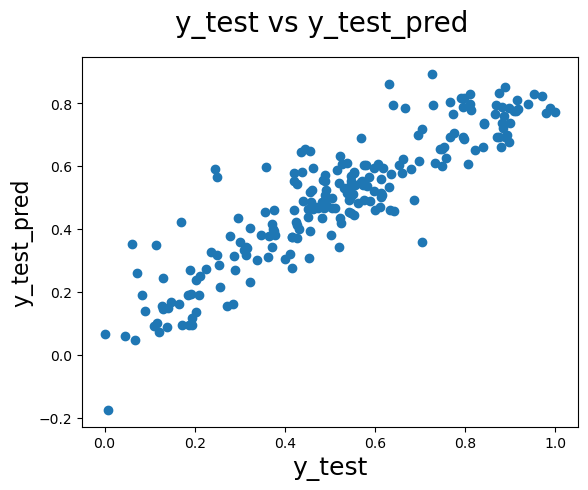

In [285]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

**Inference:**  
The variance of the residuals (error terms) remains constant across all predictions, indicating that the error terms show little variation as the predictor variable changes.

#### Plot Test vs Predicted test values


In [286]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data

def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                                           # X-label
    plt.ylabel('Counts', fontsize=16)                                          # Y-label

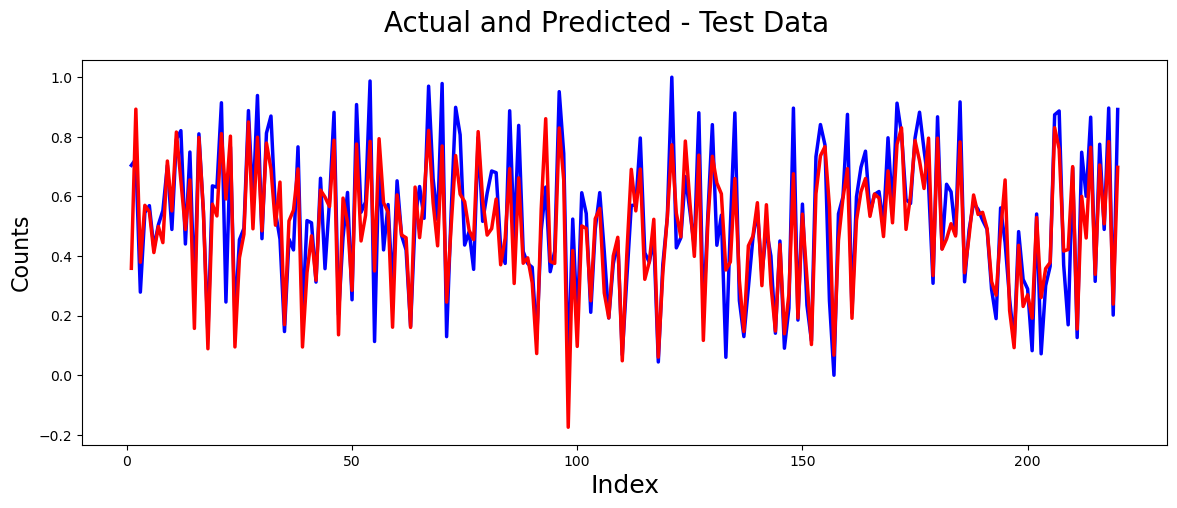

In [287]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

**Inference** :
As we can see predictions for test data is very close to actuals

## Final Conclusion -
### Intrepretting the Model:

By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

**y=0.1994 + 0.4910×temp - 0.1479×windspeed + 0.2336×Year2019 - 0.0975×holiday - 0.0672×spring + 0.0465×summer + 0.0817×winter - 0.0521×July + 0.0768×Sept - 0.2842×LightSnow_LightRain - 0.0802×Mist_Cloudy**

### Analysing the above model, the company should focus on the following features:

#### Key Insights from the Model:

1. **Significant Variables**:

Several factors significantly impact the demand for bikes (`cnt`):

- **Year (`yr`)**: The positive coefficient (0.2336) indicates a strong upward trend in bike demand over time.
- **Holiday (`holiday`)**: Holidays have a negative effect on demand, as indicated by the coefficient (-0.0975). This suggests that fewer bikes are rented on holidays.
- **Temperature (`temp`)**: The coefficient (0.4910) shows that higher temperatures lead to higher bike demand, likely due to more favorable weather conditions for cycling.
- **Windspeed (`windspeed`)**: A negative coefficient (-0.1479) means higher wind speeds reduce demand, possibly due to uncomfortable biking conditions.
- **Weather Conditions**: 
  - **LightSnow/LightRain** has a strong negative impact (-0.2842), meaning bad weather significantly lowers bike usage.
  - **Mist/Cloudy** conditions also reduce demand (-0.0802), but the effect is smaller.

3. **Seasonality Effects**:
   - Demand changes across different seasons:
     - **Spring** shows a decline in demand (-0.0672), while **Summer** and **Winter** both positively impact bike usage with coefficients of 0.0465 and 0.0817, respectively.

4. **Month-Specific Effects**:
   - The demand also fluctuates across different months:
     - **Till July** experiences lower demand (-0.0521), while **September** sees a notable increase (0.0768).

#### Model Performance:
- **R-squared** of 0.835 indicates that about 83.5% of the variance in bike demand can be explained by the model, suggesting a strong fit.
- The **Adjusted R-squared** of 0.832, which accounts for the number of predictors, reinforces the model's robustness.
- The overall model is statistically significant, as indicated by the **F-statistic** (229.6) and its corresponding p-value (5.06e-187).

#### Business Implications:
This model helps BoomBikes understand how demand varies with factors like weather, seasons, and holidays, enabling the company to:
- **Plan for High-Demand Periods**: Since warmer temperatures and non-holiday periods see higher demand, BoomBikes can increase fleet availability and marketing during these times.
- **Prepare for Weather Impact**: With reduced demand during bad weather (like rain or high wind), the company can adjust its operational strategy, perhaps offering promotions during low-demand periods.
- **Seasonal Promotions**: The higher demand during summer and winter suggests these periods could be targeted for seasonal campaigns, while strategies might be adjusted for spring, which sees a drop in usage.
- **Operational readiness**: Prepare for higher demand in months like September or under good weather conditions (clear skies, mild temperatures).
#### Conclusion:
The multiple linear regression model provides key insights into the factors driving bike demand, helping BoomBikes develop a data-driven approach to optimize its business strategy. The model can be used as a guide to anticipate customer needs and adjust operations, fleet size, and marketing efforts accordingly, thus aiding in revenue recovery post-pandemic.